In [ ]:
#Load the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

In [ ]:
#Load the data
obesity = pd.read_csv('ObesityDataSet.csv')
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Separate the independent and dependent variables
obesity_x = obesity.drop('NObesity', axis=1)
obesity_y = obesity['NObesity']

In [ ]:
#Address categorical data features with one hot encoding
obesity_x_encoded = pd.get_dummies(obesity_x, drop_first= True)
obesity_x_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0,1,...,0,1,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(obesity_x_encoded, obesity_y, test_size=0.3)

In [ ]:
#Train the model with the decision tree classifier
dtree_entropy = DecisionTreeClassifier(criterion = 'entropy',
random_state = 100, max_depth=3, min_samples_leaf=5)
dtree_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
#Predict the test dataset values using the model above
y_pred_en = dtree_entropy.predict(x_test)
y_pred_en

array(['Normal_Weight', 'Overweight_Level_I', 'Obesity_Type_I',
       'Obesity_Type_I', 'Obesity_Type_I', 'Overweight_Level_I',
       'Obesity_Type_III', 'Insufficient_Weight', 'Obesity_Type_I',
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_I',
       'Overweight_Level_I', 'Obesity_Type_I', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III', 'Obesity_Type_I', 'Overweight_Level_I',
       'Obesity_Type_II', 'Obesity_Type_I', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_I', 'Obesity_Type_III',
       'Overweight_Level_I', 'Obesity_Type_II', 'Overweight_Level_I',
       'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_I',
       'Overweight_Level_I', 'Overweight_Level_I', 'Obesity_Type_I',
       'Normal_Weight', 'Obesity_Type_I', 'Insufficient_Weight',
       'Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_I',
       'Overweight_Level_I', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type

In [ ]:
#Check the evaluation metrics of the model
accuracy = accuracy_score(y_test,y_pred_en)
precision = precision_score(y_test,y_pred_en, pos_label='positive', average='macro')
recall = recall_score(y_test,y_pred_en, pos_label='positive', average='macro')
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)

Accuracy: 61.67192429022082
Precision: 58.29744772753768
Recall: 63.785673914269005


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


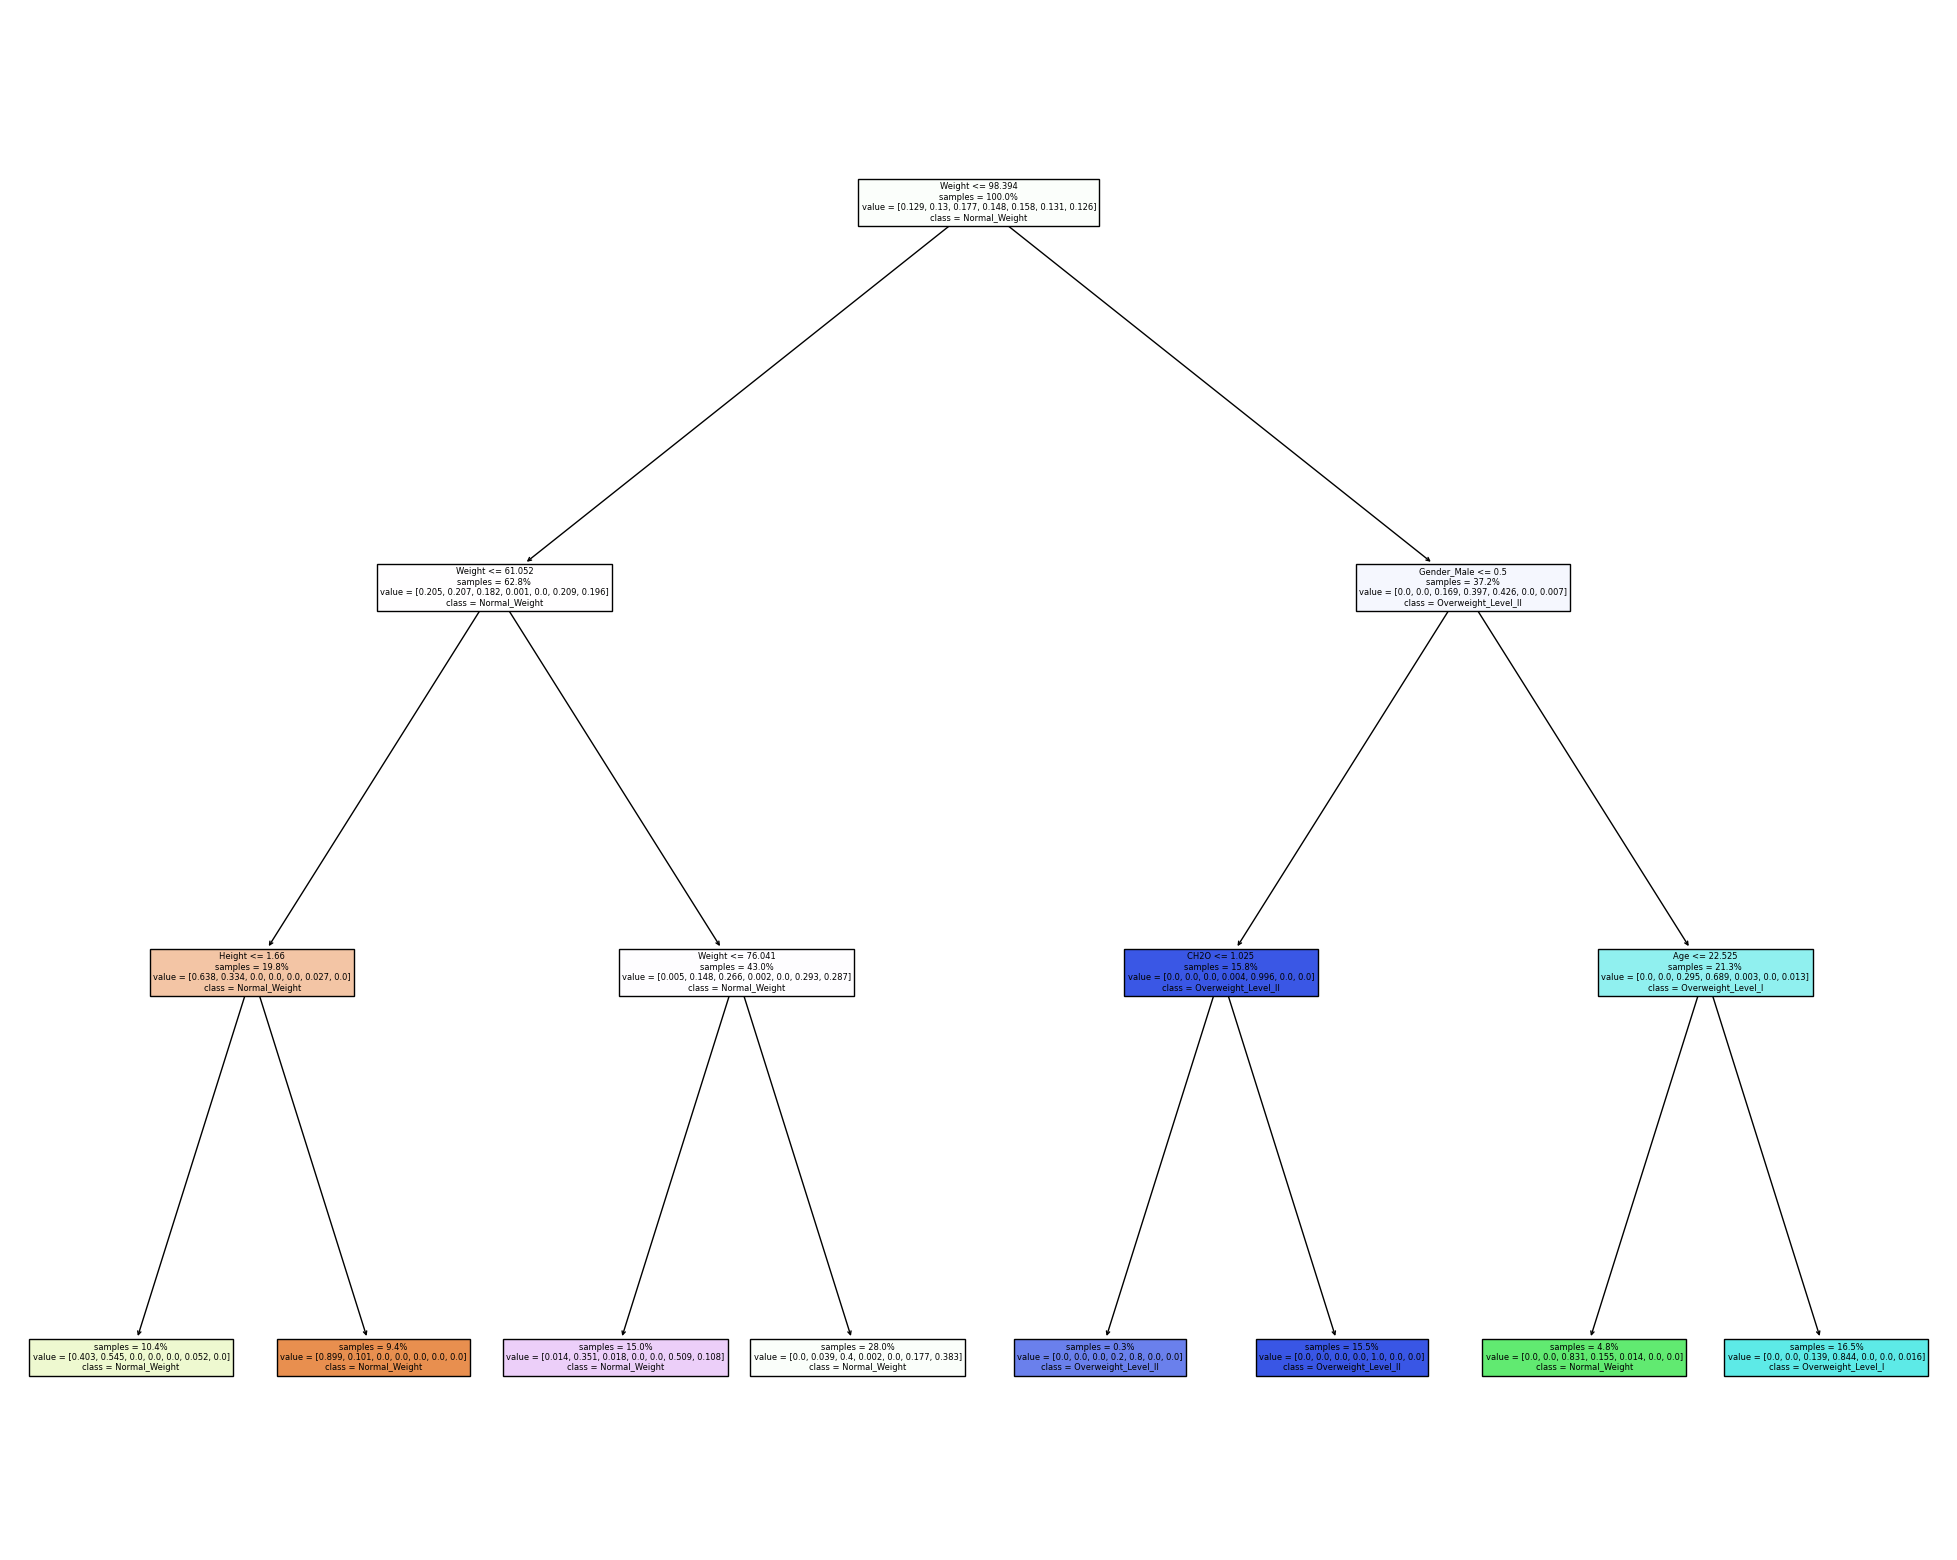

In [ ]:
#Visualize the decision tree
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree_entropy,
            feature_names = obesity_x_encoded.columns,
            class_names=obesity_y,
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')